In [1]:
import pandas as pd
from xgboost import XGBClassifier, cv
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from bayes_opt import BayesianOptimization
import numpy as np

SEED=0

# Load the dataset
- Load data from excel sheet
- Set X (independent variables) and y (dependent variables) 

In [2]:
data_path = './data/master_4Mayhew.xlsx'
df = pd.read_excel(data_path)
df.set_index('SMILES', inplace=True)
y=df['label'] # labels, independent variables
X=df.drop(['label'], axis=1) # features, dependent variables

df

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,label
SMILES,,,,,,,,,,,,,,,,,,,,,
C1=CC=C2C(=C1)C(=O)C(C2=O)(O)O,10.191572,9.610016,0,0,16.402096,2.535251,4.795559,16.402096,1.261700,3.521954,...,60.186518,178.026609,9.369822,209,23,72,89,5.506944,2.750000,False
C(=C(F)F)(C(F)(F)F)C(F)(F)F,8.786807,9.354315,0,0,11.264384,2.394170,4.788340,11.264384,0.938699,3.353751,...,43.053817,199.987226,16.665602,179,16,58,63,8.347222,2.444444,False
C1=C(C=C(C(=C1[N+](=O)[O-])O)[N+](=O)[O-])[N+](=O)[O-],11.877237,11.411786,0,0,18.380381,2.411142,4.822284,18.380381,1.148774,3.664511,...,48.280750,228.997099,12.052479,408,25,78,90,8.277778,3.555556,False
CN1C(=O)CN=C(C2=C1C=CC(=C2)Cl)C3=CC=CC=C3,15.682318,12.964430,0,0,26.034025,2.456696,4.859289,26.034025,1.301701,3.935426,...,61.882766,284.071641,8.608232,726,36,106,126,6.277778,4.388889,False
C(C(C(F)(F)F)(F)Cl)(F)Cl,7.220990,7.794227,0,0,9.758256,2.380983,4.761966,9.758256,0.975826,3.172059,...,40.351995,201.937546,18.357959,108,15,48,54,7.236111,2.062500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCCCC(=O)OCC,5.766244,6.059284,0,0,10.383983,2.015316,4.030632,10.383983,1.153776,3.007982,...,35.041491,130.099380,5.656495,108,7,32,31,4.361111,2.416667,True
C=CCSS(=O)CC=C,5.766244,6.059284,0,0,10.383983,2.015316,4.030632,10.383983,1.153776,3.007982,...,35.041491,162.017307,8.527227,108,7,32,31,4.361111,2.416667,True
CCCC(=O)OCC(C)C,6.692130,6.855805,0,0,11.127090,2.052881,4.105762,11.127090,1.112709,3.123647,...,37.120200,144.115030,5.542886,143,8,38,37,5.222222,2.500000,True


In [3]:
df.describe()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
count,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,...,865.000000,865.000000,865.000000,865.000000,865.000000,865.00000,865.000000,865.000000,858.000000,865.000000
mean,7.276908,6.894335,0.104046,0.067052,12.205152,2.088981,4.152585,12.205152,1.146352,3.063640,...,8.069476,39.174177,152.287403,8.109239,221.567630,11.07052,44.917919,48.427746,4.626886,2.476895
std,3.991268,3.246953,0.394751,0.319344,6.483015,0.340398,0.665934,6.483015,0.155949,0.574341,...,1.687440,12.156193,66.800469,7.067873,328.019108,9.73424,28.066950,34.772870,1.759080,1.053846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,...,0.000000,1.000000,16.031300,3.206260,0.000000,0.00000,0.000000,0.000000,1.250000,0.000000
25%,4.352030,4.736714,0.000000,0.000000,7.878462,1.956295,3.899712,7.878462,1.095322,2.752227,...,7.601402,32.187603,106.041865,5.580192,46.000000,4.00000,24.000000,24.000000,3.361111,1.750000
50%,6.801520,6.765664,0.000000,0.000000,11.342564,2.124117,4.202006,11.342564,1.174300,3.124521,...,8.298291,38.565088,144.115030,6.479693,120.000000,9.00000,40.000000,41.000000,4.361111,2.333333
75%,8.900428,8.519427,0.000000,0.000000,15.081987,2.292600,4.581552,15.081987,1.239221,3.395507,...,9.094144,45.012208,184.146330,8.062289,253.000000,15.00000,56.000000,62.000000,5.472222,3.000000
max,28.538901,20.779696,4.000000,4.000000,47.000875,2.724597,5.283099,47.000875,1.417947,4.523954,...,10.696050,88.394033,531.180395,126.904473,4692.000000,57.00000,194.000000,229.000000,14.375000,7.791667


# Explore the dataset

## How many missing values?

- There's 92 columns all NaNs
- 160 columns with > 90% NaNs

In [3]:
print(df.isna().mean(axis=0).nlargest(300))

SpAbs_Dt     1.000000
SpMax_Dt     1.000000
SpDiam_Dt    1.000000
SpAD_Dt      1.000000
SpMAD_Dt     1.000000
               ...   
AATS6m       0.213873
AATS6v       0.213873
AATS6se      0.213873
AATS6pe      0.213873
AATS6are     0.213873
Length: 300, dtype: float64


In [4]:
print(f"Number of columns with all NaNs \n{(df.isna().mean(axis=0) == 1).value_counts()}")

Number of columns with all NaNs 
False    1735
True       92
dtype: int64


In [5]:
print(f"Number of columns with >0.9 NaNs \n{(df.isna().mean(axis=0) > 0.9).value_counts()}")

Number of columns with >0.9 NaNs 
False    1667
True      160
dtype: int64


In [6]:
print(f"Number of columns with a NaN \n{ len(df.columns[df.isna().any()].tolist())}")

Number of columns with a NaN 
623


### Visualise number of NaNs in descriptors with missing values 

Text(0.5, 0, 'Percentage NaNs in descriptors with missing values')

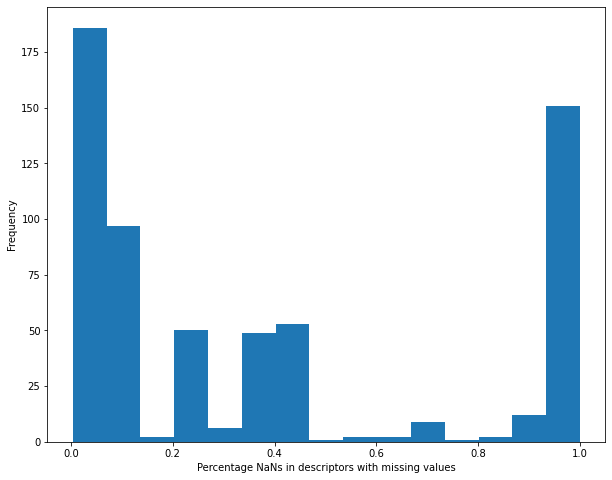

In [8]:
percs = df.isna().mean(axis=0)

ax = percs[(percs > 0)].plot.hist(figsize=(10, 8), bins=15)
plt.xlabel("Percentage NaNs in descriptors with missing values")

## Correlation between the descriptors

- degree to which features are related 
- https://jayant017.medium.com/hyperparameter-tuning-in-xgboost-using-randomizedsearchcv-88fcb5b58a73

In [4]:
# Remove descriptors of dataframe with > 50% nans
nans = df.isna().mean(axis=0)
# set threshold for percentage nans before we drop 
thresh = nans[nans >= 0.5]
df_corrs = df.copy()
df_corrs = df_corrs.drop(thresh.index, axis=1)
corrs = df_corrs.corr()
corrs

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,label
ABC,1.000000,0.984817,0.002461,0.030907,0.989272,0.728026,0.735420,0.989272,0.528869,0.920121,...,0.882940,0.938751,-0.164554,0.853747,0.958762,0.991934,0.975321,0.784337,0.952894,-0.403256
ABCGG,0.984817,1.000000,0.017644,0.022007,0.966578,0.775729,0.781912,0.966578,0.529618,0.945448,...,0.903297,0.932150,-0.185056,0.798247,0.943907,0.974350,0.955708,0.841003,0.943962,-0.397517
nAcid,0.002461,0.017644,1.000000,0.220033,-0.026060,0.013846,0.020202,-0.026060,-0.108716,0.010658,...,-0.015430,0.016209,0.020762,-0.000492,-0.026008,-0.008421,-0.021712,0.119666,-0.010251,-0.219711
nBase,0.030907,0.022007,0.220033,1.000000,0.029622,-0.004723,-0.003677,0.029622,0.019905,-0.001987,...,0.009335,0.020061,-0.052047,0.087532,0.024540,0.032639,0.033790,0.011183,0.022760,-0.129745
SpAbs_A,0.989272,0.966578,-0.026060,0.029622,1.000000,0.686444,0.694428,1.000000,0.585872,0.911180,...,0.860329,0.925137,-0.191532,0.862143,0.940489,0.973580,0.954450,0.727824,0.974252,-0.369529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zagreb1,0.991934,0.974350,-0.008421,0.032639,0.973580,0.733251,0.736072,0.973580,0.509538,0.892694,...,0.888302,0.923774,-0.131867,0.836143,0.978751,1.000000,0.995078,0.768777,0.915895,-0.429542
Zagreb2,0.975321,0.955708,-0.021712,0.033790,0.954450,0.727515,0.726369,0.954450,0.500624,0.863221,...,0.884178,0.899164,-0.116056,0.813741,0.985556,0.995078,1.000000,0.740262,0.881352,-0.438329
mZagreb1,0.784337,0.841003,0.119666,0.011183,0.727824,0.614418,0.646097,0.727824,0.088493,0.745377,...,0.645128,0.825265,-0.058776,0.685694,0.779434,0.768777,0.740262,1.000000,0.773834,-0.429089
mZagreb2,0.952894,0.943962,-0.010251,0.022760,0.974252,0.625249,0.641950,0.974252,0.562932,0.897124,...,0.794815,0.920330,-0.214293,0.861128,0.883217,0.915895,0.881352,0.773834,1.000000,-0.328786


In [11]:
corrs.to_csv('descriptor-correlations.csv')  

# Extract correlation scores for important features

In [353]:
def corrs_important_features(model, X_test, model_name, nlargest=100, heatmap=14):
    feature_imp = pd.Series(model.feature_importances_,index=X_test.columns.values).sort_values(ascending=False)
    top_100 = feature_imp.nlargest(100)
    important_df = df.loc[:,top_100.index]
    corrs = important_df.corr()
    
    print(f"Extracted correlation scores for most important {nlargest} features for {model_name}")
    corrs.to_csv(f'correlations/descriptor-corrs-top{nlargest}-{model_name}.csv')  
    
    # Print heatmap for top n
    print(f"Printing heatmap for most important {heatmap} features")
    
    top_10 = feature_imp.nlargest(heatmap)
    important_df_10 = df.loc[:,top_10.index]
    corrs_10 = important_df_10.corr()
    
    plt.figure(figsize = (16,16))
    heatmap = sns.heatmap(corrs_10, vmin=-1, vmax=1, annot=True)
    # Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Split the dataset
- Split dataset into training and test set 
- Use equal proportions of odor/odorless class

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0) # 70% training and 30% test
percentage_odorless = y_train.value_counts()[False]/y_train.shape[0]
percentage_odor = 1 - percentage_odorless
print(f"Total number molecules in training set: {y_train.shape[0]}")
print(f"Odor: {y_train.value_counts()[True]}")
print(f"Odorless: {y_train.value_counts()[False]}")

print(f"\nTotal number molecules in test set: {y_test.shape[0]}")
print(f"Odor: {y_test.value_counts()[True]}")
print(f"Odorless: {y_test.value_counts()[False]}")

print(f"\nPercentage odorless {y_test.value_counts()[False]/y_test.shape[0]}")

Total number molecules in training set: 692
Odor: 492
Odorless: 200

Total number molecules in test set: 173
Odor: 123
Odorless: 50

Percentage odorless 0.28901734104046245


# Test Model 

In [5]:
def test_model(model, y_test, X_test, verbose=True):
    y_pred=model.predict(X_test)
    y_pred_probs=model.predict_proba(X_test)[:,1]
    
    if verbose:
        print("ROC_AUC (TEST):",metrics.roc_auc_score(y_test, y_pred_probs))
        print("\n\nCLASSIFICATION REPORT:\n",metrics.classification_report(y_test, y_pred))
        
        if hasattr(model, 'feature_importances_'):
            feature_imp = pd.Series(model.feature_importances_,index=X_test.columns.values).sort_values(ascending=False)
            top_20 = feature_imp.nlargest(20)
            sns.barplot(x=top_20, y=top_20.index)
            plt.xlabel('Descriptor Importance Score')
            plt.ylabel('Descriptor')
            plt.title("Top descriptors")
            plt.show()
        
        fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probs)  
        
        #create ROC curve
        plt.plot(fpr,tpr)
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        
    return metrics.roc_auc_score(y_test, y_pred_probs) 

# Handle Non Important Descriptors 

1. Remove values below threshold e.g. 0, any descriptors with 0 importance
2. Get the top N descriptors

In [5]:
def handle_importance(model, X_train, X_test, threshold=-1, n=-1, verbose=None):
    feature_imp = pd.Series(model.feature_importances_,index=X_train.columns.values).sort_values(ascending=False)
    if threshold >= 0:
        feature_imp = feature_imp[feature_imp > threshold]
    
    if n >= 0: 
        feature_imp = feature_imp.nlargest(n)
        
    if verbose: 
        print(feature_imp)
        
    X_train = X_train.loc[:, feature_imp.axes[0].tolist()]
    X_test = X_test.loc[:, feature_imp.axes[0].tolist()]

    return X_train, X_test, model 

In [6]:
imp_params = [
#               {"threshold":0, 'n':-1},
#               {"threshold":0.001, 'n':-1},
#               {"threshold":0.01, 'n':-1},
              {"threshold":-1, 'n':5}, 
              {"threshold":-1, 'n':10}, 
              {"threshold":-1, 'n':25}, 
              {"threshold":-1, 'n':50},
              {"threshold":-1, 'n':100}, 
              {"threshold":-1, 'n':200}, 
              {"threshold":-1, 'n':400}, 
              {"threshold":-1, 'n':800},
              {"threshold":-1, 'n':1203}]

# These descriptors must be included in every experiment 
check_descriptors = ['TopoPSA(NO)', 'nHetero', 'nHBDon', 'ATS4P', 'NsCH3', 'IC3', 'EState_VSA6', 'AATSOV', 'NsOH','SpAD_DzZ', 'SM1_DZ(v)']

def optimiseImportance(model, X_train, X_test, y_train, y_test, k=5, verbose=True):
    print(f"Cross validated importance experiment with k={k}")
    
    imp_df = pd.DataFrame(columns=['Most important N descriptors', 'Average ROC_AUC', 'Standard Deviation'])

    for imp_param in imp_params: 
        name = (f"Threshold:{imp_param['threshold']}N:{imp_param['n']}".replace("N:-1", '')).replace("Threshold:-1", '')
        print(name)

        X_train_cv, _, _ = handle_importance(model, 
                                            X_train.copy(), 
                                            X_test.copy(), 
                                            threshold=imp_param['threshold'], 
                                            n=imp_param['n'])
        

#         if not set(check_descriptors).issubset(set(X_train_fold.columns.values.tolist())): 
#             continue
#         else:
        roc_auc_nans = cross_val_score(model, X_train_cv, y_train, cv=k, scoring='roc_auc')
        
        imp_df = imp_df.append({'Most important N descriptors': imp_param['n'], 
                               'Average ROC_AUC':np.mean(roc_auc_nans), 
                               'Standard Deviation':np.std(roc_auc_nans)}, 
                                ignore_index = True)

    if verbose:
        fig = imp_df.plot(kind="bar", x="Most important N descriptors", y="Average ROC_AUC", yerr="Standard Deviation", title=f"ROC_AUC after filtering descriptors by importance CV={k}", legend=False)
        
        plt.ylim(0.90,1)
        
    return imp_df

# Handle NaNs


- You cannot have any missing values in the random forest model, you can in XGB
- You cannot have mismatched features between columns in the random forest model
- 3 options 
    1. Remove any columns with missing values 
    2. Remove columns above threshold percentange NaNs e.g. 60% NaNs. 
    3. Remove columns above threshold percentange NaNs e.g. 60% NaNs. Replace columns below threshold with missing values with the mean value.

In [7]:
def handleNaNs(X_tr, X_te, option=1, thresh=0.6): 
    if option == 1:
        nans =  X.columns[X.isna().any()].tolist()
        X_tr.drop(nans, inplace = True, axis=1)
        X_te.drop(nans, inplace = True, axis=1)
    else: 
        nans = X.isna().mean(axis=0)
        # set threshold for percentage nans before we drop 
        X_thresh = nans[nans >= thresh]
        X_tr.drop(X_thresh.index, 
          axis=1, 
          inplace=True)
        X_te.drop(X_thresh.index, 
          axis=1, 
          inplace=True)
        
        if option == 3: 
            X_tr.fillna(X_train.mean(), inplace=True) 
            X_te.fillna(X_test.mean(), inplace=True)
    
    return X_tr, X_te

In [8]:
def optimiseNaNs(model, X_train, X_test, y_train, y_test, option=2, k=5, verbose=True): 
    print(f"Cross validated missing values experiment with k={k}")
    
    percentages = [x/100 for x in range(0, 100, 10)] 
    nans_df = pd.DataFrame(columns=['Name', 'Average ROC_AUC', 'Standard Deviation'])

    for perc in percentages: 
        name = str(perc)
        if perc == 0:
            X_train_cv, _  = handleNaNs(X_train.copy(), X_test.copy(), option=1)
        else:
            X_train_cv, _  = handleNaNs(X_train.copy(), X_test.copy(), option=option, thresh=perc)

        roc_auc_nans = cross_val_score(model, X_train_cv, y_train, cv=k, scoring='roc_auc')
        
        nans_df = nans_df.append({'Name': name, 
                                   'Average ROC_AUC':np.mean(roc_auc_nans), 
                                   'Standard Deviation':np.std(roc_auc_nans)}, 
                                    ignore_index = True)

    if verbose:
        fig = nans_df.plot(kind="bar", x="Name", y="Average ROC_AUC", yerr="Standard Deviation", title=f"ROC_AUC after thresholding descriptors by % NaNs CV={k}", legend=False)
        plt.ylim(0.95,0.98)
        
    return nans_df

# Random Forest Model

https://www.datacamp.com/tutorial/random-forests-classifier-python

In [360]:
# set random state to 0 to allow reproducible results
clf=RandomForestClassifier(random_state=0) 

# For readability
y_train_rf = y_train
y_test_rf = y_test
X_train_rf = X_train
X_test_rf = X_test

## Handle NaNs RF

Cross validated missing values experiment with k=5


,Name,Average ROC_AUC,Standard Deviation
0,0.0,0.970784,0.003906
1,0.1,0.968146,0.002932
2,0.2,0.968500,0.005369
3,0.3,0.967892,0.003344
4,0.4,0.967466,0.004047
5,0.5,0.964738,0.006947
6,0.6,0.967132,0.002913
7,0.7,0.967452,0.004857
8,0.8,0.968936,0.004855
9,0.9,0.963971,0.004127


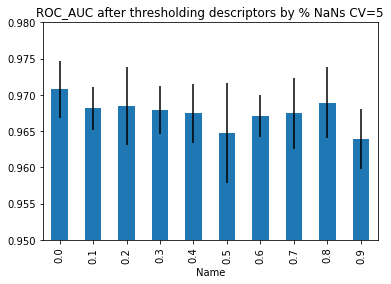

In [34]:
# choose optimal threshold for removing columns with NaNs
optimiseNaNs(clf, X_train_rf, X_test_rf, y_train_rf, y_test_rf, option=3)

It seems to have a very high standard deviation, so let's just go with removing all the columns with missing values

In [361]:
X_train_rf, X_test_rf = handleNaNs(X_train.copy(), X_test.copy(), option=1)

In [362]:
X_train_rf

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
SMILES,,,,,,,,,,,,,,,,,,,,,
C1=CC(=CC=C1C(=O)O)[N+](=O)[O-],8.841960,8.193289,1,0,14.383377,2.278414,4.556827,14.383377,1.198615,3.375782,...,0.000000,9.076237,42.233090,167.021858,9.824815,206,15,56,62,2.722222
CCCCCCCCCCCCCCCCO,11.313709,9.412260,0,0,20.860105,1.969616,3.939231,20.860105,1.227065,3.644675,...,0.000000,8.164226,45.799808,242.260966,4.750215,816,14,62,60,4.500000
C1(C(O1)(F)F)(C(F)(F)F)F,7.835111,8.587182,0,0,10.249622,2.654002,4.922702,10.249622,1.024962,3.316427,...,8.504918,9.973060,63.138207,165.985334,16.598533,105,13,58,72,1.875000
CC(C)(C=C)O,4.012290,4.284816,0,0,5.818626,2.074313,4.148627,5.818626,0.969771,2.626363,...,0.000000,7.989899,31.665095,86.073165,5.379573,28,3,24,22,1.375000
C=CCC1=CC2=C(C=C1)OCO2,9.151948,8.339656,0,0,15.669060,2.362602,4.630996,15.669060,1.305755,3.422391,...,6.580639,9.203014,56.229240,162.068080,7.366731,197,14,60,69,2.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCCCS,2.828427,3.146264,0,0,5.464102,1.732051,3.464102,5.464102,1.092820,2.390167,...,0.000000,6.192362,25.583106,90.050321,6.003355,20,2,14,12,1.500000
CCN(CC)CC,4.242641,4.859933,0,1,8.000000,2.000000,4.000000,8.000000,1.142857,2.753451,...,0.000000,7.627057,31.941317,101.120450,4.596384,48,6,24,24,2.000000
C1=CC=C(C=C1)C(=O)C2=CC=CC=C2,10.635111,9.197041,0,0,18.814625,2.307250,4.614501,18.814625,1.343902,3.558646,...,0.000000,9.282754,45.217583,182.073165,7.586382,307,18,68,77,3.222222


Test performance of Random Forest after removing all columns with NaNs
ROC_AUC (TEST): 0.9741463414634146


CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.88      0.86      0.87        50
        True       0.94      0.95      0.95       123

    accuracy                           0.92       173
   macro avg       0.91      0.91      0.91       173
weighted avg       0.92      0.92      0.92       173



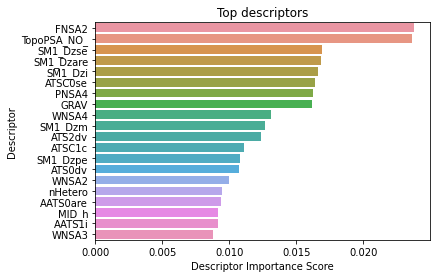

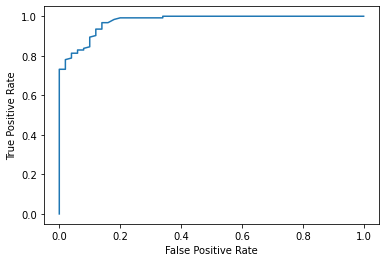

0.9741463414634146

In [363]:
clf.fit(X_train_rf, y_train_rf)
print("Test performance of Random Forest after removing all columns with NaNs")
test_model(clf, y_test_rf, X_test_rf)

## Importance Experiment

Cross validated importance experiment with k=5
N:5
N:10
N:25
N:50
N:100
N:200
N:400
N:800
N:1203


,Most important N descriptors,Average ROC_AUC,Standard Deviation
0,5.0,0.944489,0.006380
1,10.0,0.958717,0.001870
2,25.0,0.963769,0.001859
3,50.0,0.971112,0.004586
4,100.0,0.973380,0.004403
5,200.0,0.974075,0.004829
6,400.0,0.973917,0.003683
7,800.0,0.970045,0.003837
8,1203.0,0.971248,0.007054


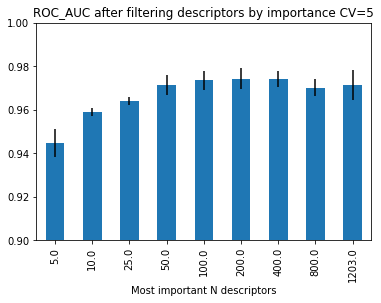

In [49]:
optimiseImportance(clf, X_train_rf, X_test_rf, y_train_rf, y_test_rf)

### Remove labels 
- best performance is with setting N to 100

In [364]:
X_train_rf, X_test_rf, clf = handle_importance(clf, 
                                               X_train_rf, 
                                               X_test_rf, 
                                               threshold=-1, 
                                               n=100)

Test performance of Random Forest after removing labels
ROC_AUC (TEST): 0.9778048780487806


CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.92      0.88      0.90        50
        True       0.95      0.97      0.96       123

    accuracy                           0.94       173
   macro avg       0.93      0.92      0.93       173
weighted avg       0.94      0.94      0.94       173



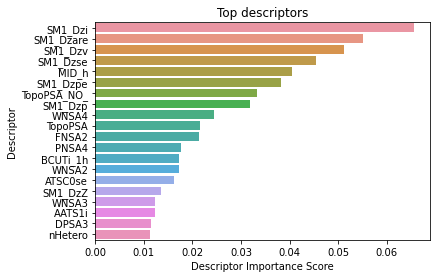

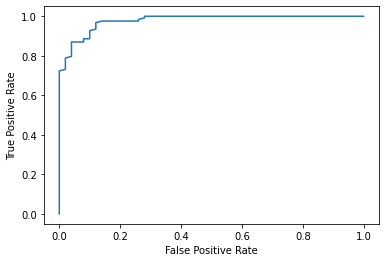

0.9778048780487806

In [365]:
clf.fit(X_train_rf, y_train_rf)
print("Test performance of Random Forest after removing labels")
test_model(clf, y_test_rf, X_test_rf)

In [52]:
X_train_rf

,FNSA2,TopoPSA_NO_,SM1_Dzse,SM1_Dzare,SM1_Dzi,ATSC0se,PNSA4,GRAV,WNSA4,SM1_Dzm,...,Mor09se,IC0,ATSC1dv,AATS0i,SMR,VSA_EState3,Mor31,Xpc_5dv,piPC2,AATSC1pe
SMILES,,,,,,,,,,,,,,,,,,,,,
C1=CC(=CC=C1C(=O)O)[N+](=O)[O-],-0.767715,80.44,1.134242,1.328525,0.917786,2.972664,-14.619011,2042.071181,-4.732438,1.139562,...,-0.093453,1.777985,7.411765,162.658468,40.0557,18.584666,-0.022071,0.365897,3.417727,0.018100
CCCCCCCCCCCCCCCCO,-0.164160,20.23,0.248495,0.285714,0.173134,1.263522,-2.006400,1704.627767,-1.250653,0.249266,...,0.318470,1.025881,-1.674740,166.693356,77.3978,8.643400,2.353381,0.000000,2.772589,-0.003319
C1(C(O1)(F)F)(C(F)(F)F)F,-1.270169,12.53,2.129495,2.627178,2.295353,3.149698,-33.188443,2387.169619,-8.671861,2.455999,...,-1.236477,1.295462,-4.000000,238.715811,15.9260,0.000000,0.012424,0.370199,2.995732,-0.084283
CC(C)(C=C)O,-0.209484,20.23,0.248495,0.285714,0.173134,1.036660,-3.397234,595.110492,-0.881495,0.249266,...,0.710519,1.198192,12.000000,166.787474,26.4948,8.708333,0.414549,0.091287,2.197225,-0.012862
C=CCC1=CC2=C(C=C1)OCO2,-0.491671,18.46,0.496990,0.571429,0.346268,1.882625,-7.888307,1869.582493,-2.784297,0.498531,...,-0.847671,1.348588,23.553719,158.546484,46.4660,0.000000,0.233277,0.592117,3.384390,0.006316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCCCS,-0.112203,0.00,0.071356,-0.024590,-0.086900,0.163932,-2.026929,441.365151,-0.549242,0.625359,...,0.576868,1.158939,-0.000219,164.245584,28.7610,0.000000,0.586830,0.000000,1.386294,-0.004077
CCN(CC)CC,-0.084435,3.24,0.140263,0.185668,0.225250,0.398851,-1.147137,688.729833,-0.342869,0.142500,...,0.984245,1.090653,12.049587,170.262317,33.4620,0.000000,0.603834,0.474342,1.945910,0.007868
C1=CC=C(C=C1)C(=O)C2=CC=CC=C2,-0.401193,17.07,0.248495,0.285714,0.173134,1.044981,-6.234910,2168.780768,-2.325509,0.249266,...,-0.088960,1.196421,12.000000,153.456435,56.3165,0.000000,0.406501,0.573767,3.663562,0.000473


## Tuning the hyperparamaters 

In [46]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(clf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


Fitting 5 folds for each of 500 candidates, totalling 2500 fits
{'n_estimators': 294, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 12, 'criterion': 'gini', 'bootstrap': False}
Hyperparamater tuned test performance of Random Forest
ROC_AUC (TEST): 0.9834146341463414


CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.91      0.86      0.89        50
        True       0.94      0.97      0.96       123

    accuracy                           0.94       173
   macro avg       0.93      0.91      0.92       173
weighted avg       0.94      0.94      0.94       173



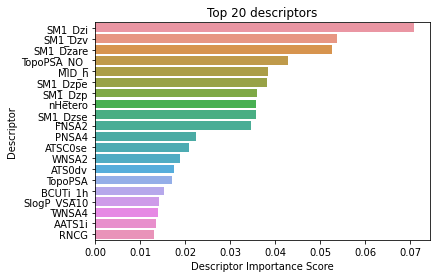

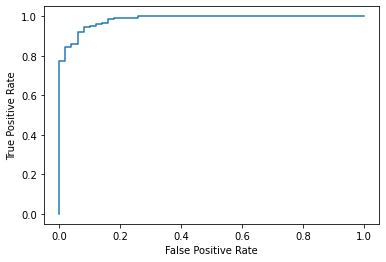

0.9834146341463414

In [49]:
# Use the grid to search for best hyperparameters
# Takes ~ 5 minutes to run 

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 50)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 50)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20, 40, 60, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion 
criterion = ['gini', 'entropy']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap, 
               'criterion': criterion}

# Random search of parameters, using 5 fold cross validation, 
# search across 500 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=clf, param_distributions = random_grid, n_iter = 500, cv = 5, verbose=1, random_state=SEED, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_rf, y_train_rf)

# Print best paramaters 
print(rf_random.best_params_)

print("Hyperparamater tuned test performance of Random Forest")
test_model(rf_random.best_estimator_, y_test_rf, X_test_rf)

In [50]:
rf_random.best_estimator_.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 294,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [613]:
tuned_rf= RandomForestClassifier(n_estimators=294,
                                 min_samples_split=10,
                                 min_samples_leaf=1,
                                 max_features='sqrt',
                                 max_depth=12,
                                 criterion='gini',
                                 bootstrap=False, 
                                 random_state=SEED)
tuned_rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(bootstrap=False, max_depth=12, min_samples_split=10,
                       n_estimators=294, random_state=0)

ROC_AUC (TEST): 0.9834146341463414


CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.91      0.86      0.89        50
        True       0.94      0.97      0.96       123

    accuracy                           0.94       173
   macro avg       0.93      0.91      0.92       173
weighted avg       0.94      0.94      0.94       173



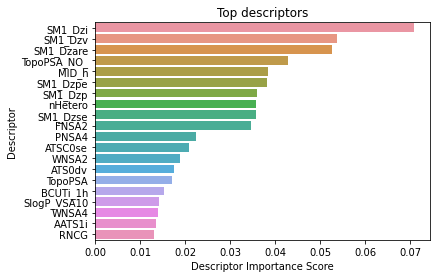

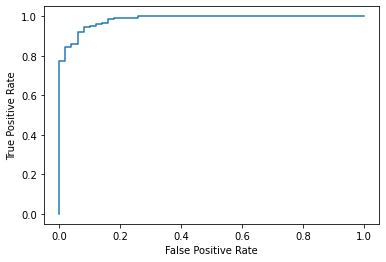

0.9834146341463414

In [614]:
test_model(tuned_rf, y_test_rf, X_test_rf)

## Extract correlation scores for important features

Extracted correlation scores for most important 100 features for random forest
Printing heatmap for most important 15 features


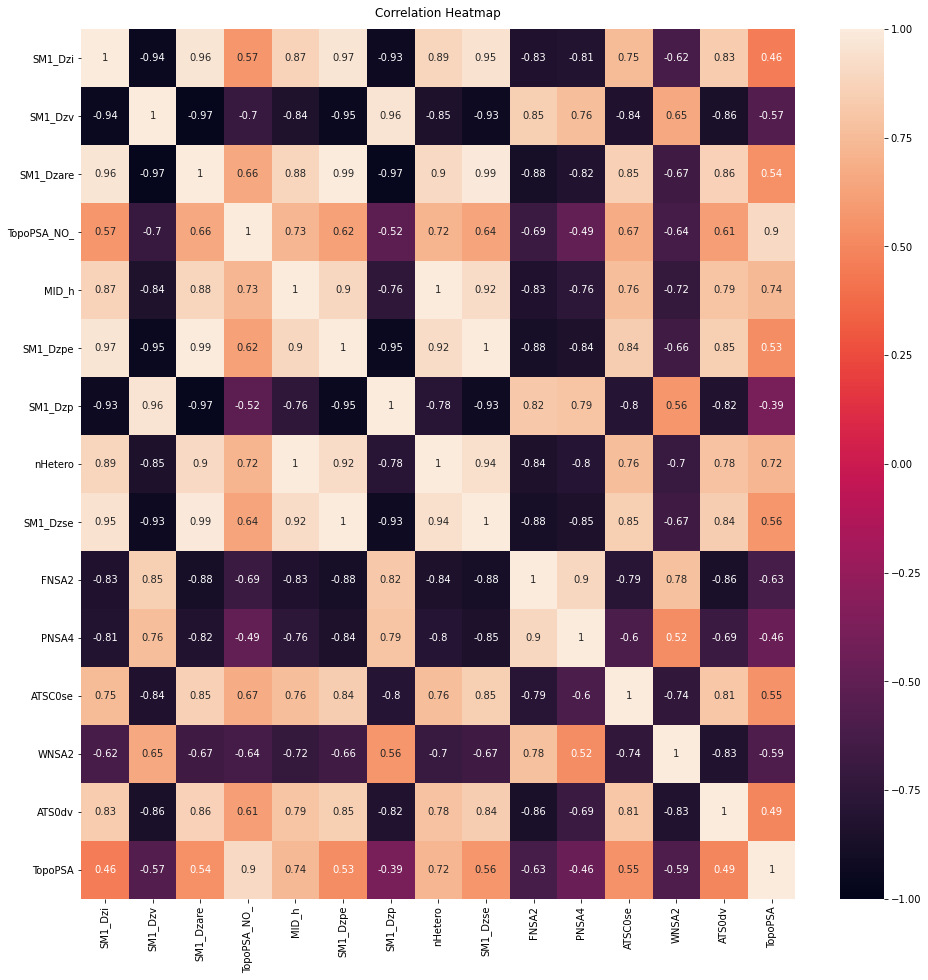

In [78]:
corrs_important_features(tuned_rf, X_test_rf, "random forest", 100, heatmap=15)

## Save dataframe used in RF to CSV
- i.e. dataframe with all columns with *any* missing values removed

In [57]:
rf_csv = df.loc[:,X_train_rf.columns]
rf_csv.to_csv('data/random-forest-df.csv')  
rf_csv

,FNSA2,TopoPSA_NO_,SM1_Dzse,SM1_Dzare,SM1_Dzi,ATSC0se,PNSA4,GRAV,WNSA4,SM1_Dzm,...,Mor09se,IC0,ATSC1dv,AATS0i,SMR,VSA_EState3,Mor31,Xpc_5dv,piPC2,AATSC1pe
SMILES,,,,,,,,,,,,,,,,,,,,,
C1=CC=C2C(=C1)C(=O)C(C2=O)(O)O,-0.915439,74.60,0.993979,1.142857,0.692537,3.054191,-16.054904,2344.195126,-5.349824,0.997062,...,-0.413947,1.509028,5.393352,157.497908,42.2716,18.218704,0.191285,1.169741,3.597312,-0.037694
C(=C(F)F)(C(F)(F)F)C(F)(F)F,-1.298106,0.00,2.508000,3.121951,2.829626,4.193376,-31.248175,3079.984723,-9.026518,2.942312,...,-2.478051,0.918296,-4.000000,244.634092,21.3520,0.000000,0.254839,0.457475,3.135494,-0.082622
C1=C(C=C(C(=C1[N+](=O)[O-])O)[N+](=O)[O-])[N+](=O)[O-],-1.567908,149.65,2.160253,2.557003,1.887688,3.687211,-29.743377,3420.554144,-10.720464,2.172360,...,-0.768105,1.896820,4.315789,170.915699,48.0700,40.214036,-0.326020,0.779968,3.725693,0.050768
CN1C(=O)CN=C(C2=C1C=CC(=C2)Cl)C3=CC=CC=C3,-0.627113,32.67,0.738805,0.773658,0.755294,2.057077,-9.128078,3902.682223,-4.384569,1.195451,...,-0.683537,1.586645,37.083245,157.840303,81.8100,0.634380,0.556803,1.712699,4.025352,0.002859
C(C(C(F)(F)F)(F)Cl)(F)Cl,-1.026223,0.00,1.987068,2.184435,2.031838,3.734135,-26.660661,2814.087423,-7.618910,3.161314,...,-1.057832,1.789929,5.087440,219.944489,26.4960,-4.491512,0.235841,0.729616,2.772589,-0.053157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCCCC(=O)OCC,-0.214952,26.30,0.496990,0.571429,0.346268,1.975926,-3.294040,1059.468170,-1.161034,0.498531,...,1.257362,1.264673,28.982987,167.274356,36.1580,0.000000,0.663010,0.100592,2.397895,0.004651
C=CCSS(=O)CC=C,-0.272162,17.07,0.391207,0.236534,-0.000667,1.148345,-5.106279,1564.446393,-1.820266,1.499983,...,0.145466,1.577977,-8.325023,158.423871,45.8614,0.000000,0.337999,0.530330,2.564949,0.001204
CCCC(=O)OCC(C)C,-0.222321,26.30,0.496990,0.571429,0.346268,2.012234,-3.194120,1218.316536,-1.193149,0.498531,...,1.344064,1.238901,30.994083,167.074610,40.7050,0.000000,0.830591,0.178519,2.564949,0.004367


# XgBoost

https://practicaldatascience.co.uk/machine-learning/how-to-create-a-classification-model-using-xgboost

In [366]:
# for readibility 
y_train_xgb = y_train
y_test_xgb = y_test
X_train_xgb = X_train
X_test_xgb = X_test

## Create model

In [367]:
xgb = XGBClassifier(random_state=SEED)
xgb.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

Baseline test performance of XGBoost
ROC_AUC (TEST): 0.9754471544715447


CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.90      0.90      0.90        50
        True       0.96      0.96      0.96       123

    accuracy                           0.94       173
   macro avg       0.93      0.93      0.93       173
weighted avg       0.94      0.94      0.94       173



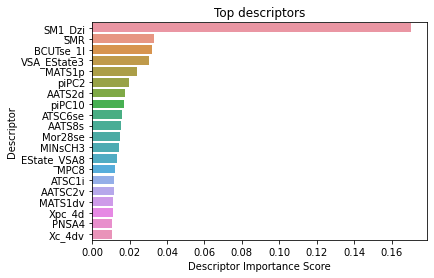

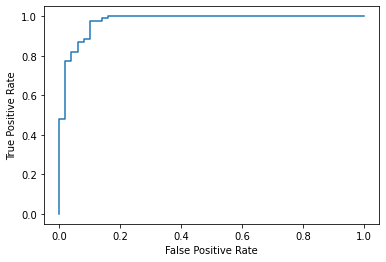

0.9754471544715447

In [368]:
# Baseline results
print("Baseline test performance of XGBoost")
test_model(xgb, y_test_xgb, X_test_xgb)

## Handle NaNs

Cross validated missing values experiment with k=5


,Name,Average ROC_AUC,Standard Deviation
0,0.0,0.970720,0.004632
1,0.1,0.969555,0.003055
2,0.2,0.969100,0.001470
3,0.3,0.968945,0.002606
4,0.4,0.966706,0.003670
5,0.5,0.966507,0.001691
6,0.6,0.968182,0.002727
7,0.7,0.967666,0.003408
8,0.8,0.968379,0.003460
9,0.9,0.968379,0.003460


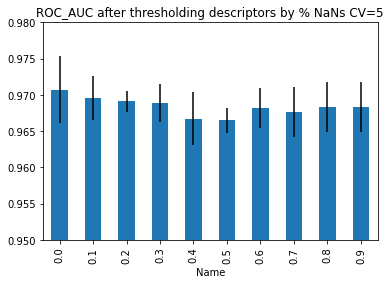

In [369]:
# choose optimal threshold for removing columns with NaNs
optimiseNaNs(xgb, X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb, option=2)

Choose to remove any columns with NaNs

In [370]:
X_train_xgb, X_test_xgb = handleNaNs(X_train_xgb.copy(), X_test_xgb.copy(), option=1, thresh=0)

Test performance of XGBoost after removing NaNs
ROC_AUC (TEST): 0.9705691056910569


CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.94      0.90      0.92        50
        True       0.96      0.98      0.97       123

    accuracy                           0.95       173
   macro avg       0.95      0.94      0.94       173
weighted avg       0.95      0.95      0.95       173



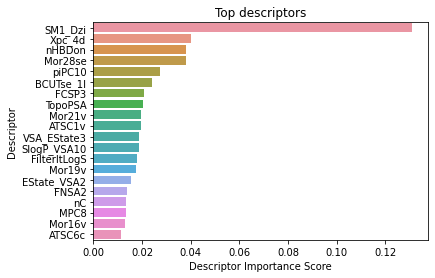

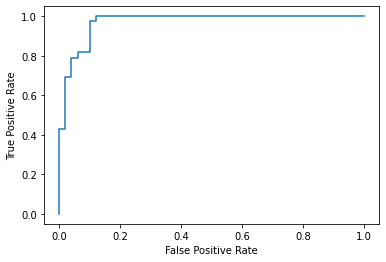

0.9705691056910569

In [371]:
xgb.fit(X_train_xgb, y_train_xgb)
print("Test performance of XGBoost after removing NaNs")
test_model(xgb, y_test_xgb, X_test_xgb)

## Importance Experiment XGB

Cross validated importance experiment with k=5
N:5
N:10
N:25
N:50
N:100
N:200
N:400
N:800
N:1203


,Most important N descriptors,Average ROC_AUC,Standard Deviation
0,5.0,0.957280,0.006009
1,10.0,0.961766,0.010015
2,25.0,0.975956,0.005756
3,50.0,0.979069,0.002700
4,100.0,0.977904,0.004391
5,200.0,0.974487,0.002900
6,400.0,0.972098,0.003250
7,800.0,0.969805,0.004610
8,1203.0,0.974384,0.003948


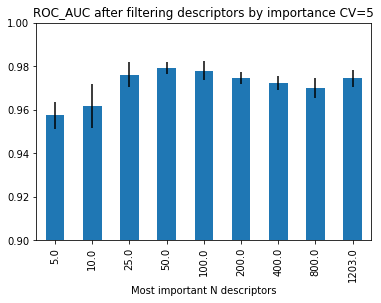

In [372]:
optimiseImportance(xgb, X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb)

Test performance after filtering by importance XGBoost
ROC_AUC (TEST): 0.9699186991869919


CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.90      0.90      0.90        50
        True       0.96      0.96      0.96       123

    accuracy                           0.94       173
   macro avg       0.93      0.93      0.93       173
weighted avg       0.94      0.94      0.94       173



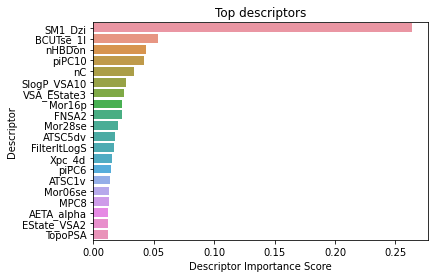

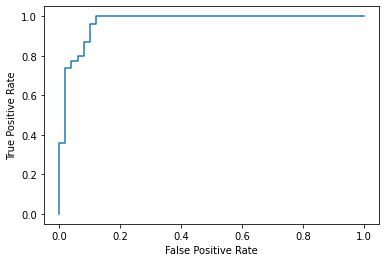

0.9699186991869919

In [373]:
X_train_xgb, X_test_xgb, xgb = handle_importance(xgb, 
                                                X_train_xgb, 
                                                X_test_xgb, 
                                                threshold=-1, 
                                                n=100)
xgb.fit(X_train_xgb, y_train_xgb)

# Filted importance results
print("Test performance after filtering by importance XGBoost")
test_model(xgb, y_test_xgb, X_test_xgb)

In [61]:
X_train_xgb

,SM1_Dzi,Xpc_4d,nHBDon,Mor28se,piPC10,BCUTse_1l,FCSP3,TopoPSA,Mor21v,ATSC1v,...,SIC3,PEOE_VSA9,Xc_3d,ATSC3c,Mor26,Mor13,Mor13p,IC0,MID_N,BCUTc_1l
SMILES,,,,,,,,,,,,,,,,,,,,,
C1=CC(=CC=C1C(=O)O)[N+](=O)[O-],0.917786,2.080880,1,0.172126,0.000000,2.437846,0.0,80.44,-0.195907,50.168861,...,1.000000,10.486763,1.000000,0.107048,-0.297601,-0.107249,-0.298644,1.777985,2.012880,-0.387593
CCCCCCCCCCCCCCCCO,0.173134,0.000000,1,-0.361095,2.079442,2.550132,1.0,20.23,-0.659213,-73.692870,...,0.467623,0.000000,0.000000,0.015420,1.057518,1.499624,0.576315,1.025881,0.000000,-0.223154
C1(C(O1)(F)F)(C(F)(F)F)F,2.295353,5.041815,0,-0.030493,0.000000,2.589681,1.0,12.53,-0.003930,-29.059914,...,0.796658,0.000000,2.774049,-0.076539,-0.065844,-0.592651,-0.292314,1.295462,0.000000,-0.293189
CC(C)(C=C)O,0.173134,1.060660,1,-0.154986,0.000000,2.498174,0.6,20.23,-0.063345,-64.083880,...,0.695160,5.601051,1.560660,-0.069567,0.294281,0.299103,-0.071999,1.198192,0.000000,-0.257264
C=CCC1=CC2=C(C=C1)OCO2,0.346268,1.327709,0,-0.118756,3.548180,2.437101,0.2,18.46,-0.120608,-32.245275,...,0.938843,0.000000,0.537457,0.083168,0.064225,-0.421997,-0.463456,1.348588,0.000000,-0.486864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCCCS,-0.086900,0.000000,1,-0.200455,0.000000,2.575514,1.0,38.80,-0.162785,-115.229220,...,0.816480,0.000000,0.000000,0.003194,0.278638,0.502512,0.217970,1.158939,0.000000,-0.173142
CCN(CC)CC,0.225250,0.612372,0,-0.212719,0.000000,2.608011,1.0,3.24,-0.318129,-213.508320,...,0.454182,0.000000,0.204124,-0.048836,0.298575,0.981494,0.275455,1.090653,2.045385,-0.374281
C1=CC=C(C=C1)C(=O)C2=CC=CC=C2,0.173134,1.541519,0,-0.082979,5.731874,2.432022,0.0,17.07,-0.330898,42.202219,...,0.713649,0.000000,0.525783,0.045485,-0.151671,0.443743,-0.291929,1.196421,0.000000,-0.377925


## Tuning paramaters 

In [165]:
params = {
    'learning_rate': (0.01, 1.0),
    'n_estimators': (100, 1000),
    'max_depth': (3,10),
#    'subsample': (0.7, 1.0),  # Change for big datasets
    'colsample_bytree': (0.7, 1.0),  # Change for datasets with lots of features
    'gamma': (0, 5), 
    'scale_pos_weight': (1, 2.5)
    }

def xgboost_hyper_param(learning_rate,
                        n_estimators,
                        max_depth,
                        colsample_bytree,
                        gamma, 
                        scale_pos_weight):

    max_depth = int(max_depth)
    n_estimators = int(n_estimators)

    xgb_temp = XGBClassifier(
        max_depth=max_depth,
        colsample_bytree=colsample_bytree,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        gamma=gamma,
        scale_pos_weight=scale_pos_weight,
        seed=SEED)
    
    # calculate CV=5 K fold ROC_AUC accuracy for each model 

    return np.array(cross_val_score(xgb_temp, X_train_xgb, y_train_xgb, cv=5, scoring='roc_auc')).mean()

optimizer = BayesianOptimization(
            f=xgboost_hyper_param,
            pbounds=params,
            random_state=SEED)

optimizer.maximize(init_points=2, n_iter=25)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | n_esti... | scale_... |
-------------------------------------------------------------------------------------------------
| 1         | 0.973     | 0.8646    | 3.576     | 0.6067    | 6.814     | 481.3     | 1.969     |
| 2         | 0.9663    | 0.8313    | 4.459     | 0.964     | 5.684     | 812.6     | 1.793     |
| 3         | 0.9679    | 0.8742    | 3.08      | 0.557     | 7.744     | 482.0     | 2.447     |
| 4         | 0.973     | 0.7767    | 2.654     | 0.1422    | 9.874     | 855.2     | 1.472     |
| 5         | 0.9755    | 0.8818    | 0.06451   | 0.6193    | 5.891     | 992.5     | 1.636     |
| 6         | 0.976     | 0.7463    | 0.614     | 0.129     | 9.816     | 374.5     | 1.767     |
| 7         | 0.9716    | 0.7496    | 0.9489    | 0.4696    | 9.269     | 522.9     | 1.286     |
| 8         | 0.9687    | 0.7653    | 3.827     | 0.5729    | 7.477     | 156.4     | 1.487     |
| 9         | 0.9691

{'colsample_bytree': 0.7462619019069298, 'gamma': 0.6140405455236808, 'learning_rate': 0.12901388006056644, 'max_depth': 9, 'n_estimators': 374, 'scale_pos_weight': 1.7670956487830878}
ROC_AUC (TEST): 0.9773983739837399


CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.92      0.88      0.90        50
        True       0.95      0.97      0.96       123

    accuracy                           0.94       173
   macro avg       0.93      0.92      0.93       173
weighted avg       0.94      0.94      0.94       173



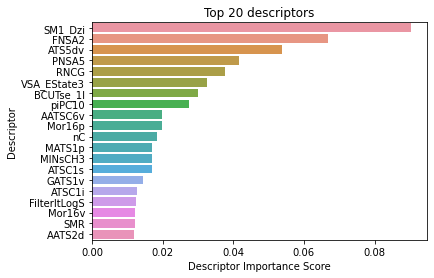

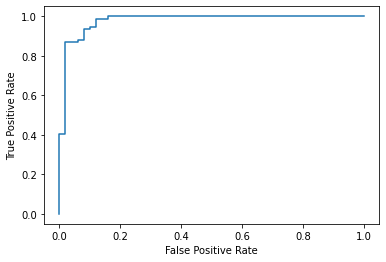

0.9773983739837399

In [166]:
params_tuned_xgb = optimizer.max['params']
params_tuned_xgb['max_depth'] = int(params_tuned_xgb['max_depth'])
params_tuned_xgb['n_estimators'] = int(params_tuned_xgb['n_estimators'])
print(params_tuned_xgb)

tuned_xgb = XGBClassifier(**params_tuned_xgb, seed=SEED)
tuned_xgb.fit(X_train_xgb, y_train_xgb)
test_model(tuned_xgb, y_test_xgb, X_test_xgb)

### Final tuned paramaters


ROC_AUC (TEST): 0.9744715447154472


CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       1.00      0.88      0.94        50
        True       0.95      1.00      0.98       123

    accuracy                           0.97       173
   macro avg       0.98      0.94      0.96       173
weighted avg       0.97      0.97      0.96       173



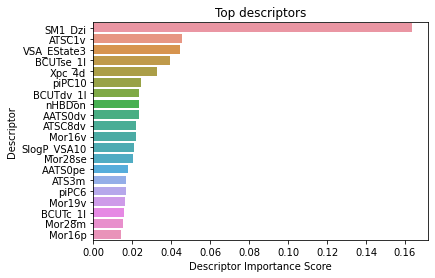

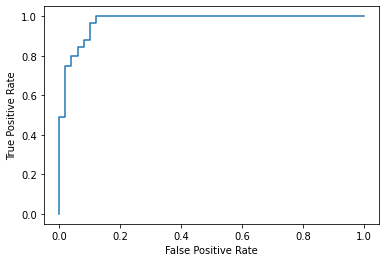

0.9744715447154472

In [374]:
tuned_xgb = XGBClassifier(gamma=3.1596294614733864, 
                          learning_rate=0.3651332655950466, 
                          max_depth=5, 
                          n_estimators=801, 
                          scale_pos_weight=1.8627159417510182,
                          seed=SEED,  
                          n_jobs = -1)
tuned_xgb.fit(X_train_xgb, y_train_xgb)
test_model(tuned_xgb, y_test_xgb, X_test_xgb)

## Extract correlation for 'important' features

Extracted correlation scores for most important 100 features for xgb
Printing heatmap for most important 15 features


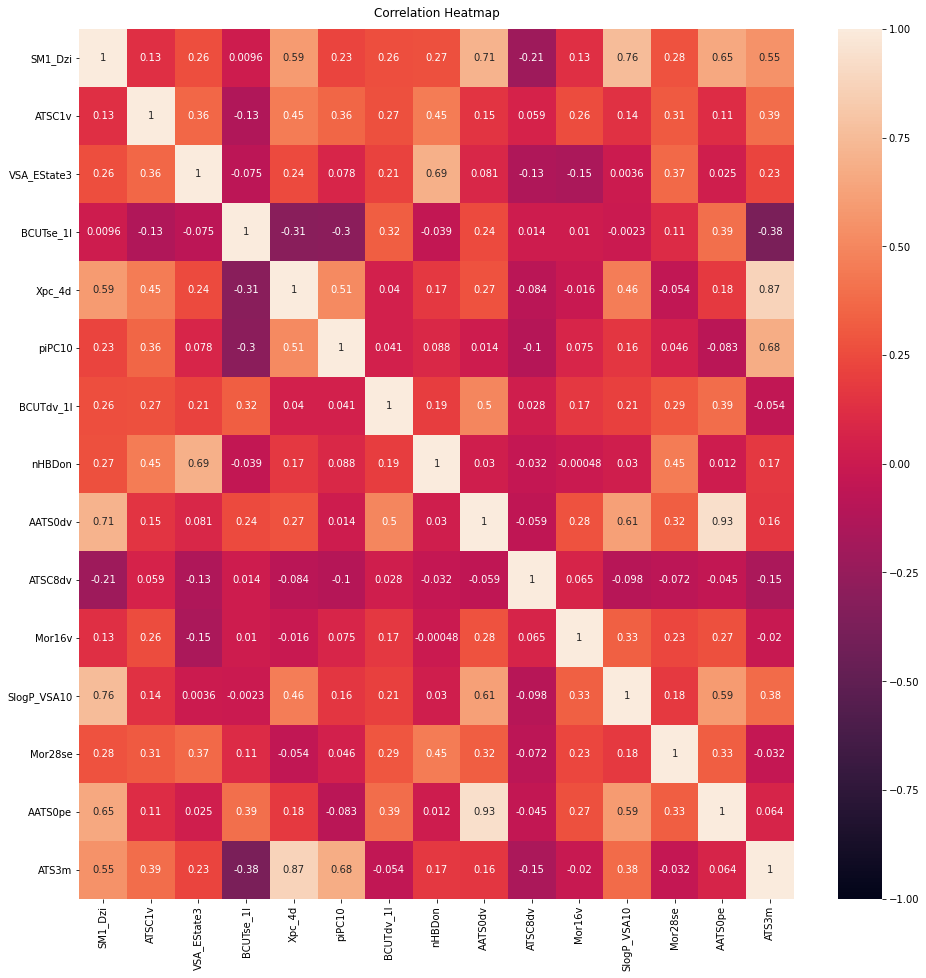

In [65]:
corrs_important_features(tuned_xgb, X_test_xgb, "xgb", 100, 15)

## Save dataframe used in XGB to CSV

In [105]:
rf_csv = df.loc[:,X_train_xgb.columns]
rf_csv.to_csv('data/xgb-df.csv')  
rf_csv

,SM1_Dzi,Xpc_4d,nHBDon,Mor28se,piPC10,BCUTse_1l,FCSP3,TopoPSA,Mor21v,ATSC1v,...,SIC3,PEOE_VSA9,Xc_3d,ATSC3c,Mor26,Mor13,Mor13p,IC0,MID_N,BCUTc_1l
SMILES,,,,,,,,,,,,,,,,,,,,,
C1=CC=C2C(=C1)C(=O)C(C2=O)(O)O,0.692537,4.199803,2,0.409774,4.123094,2.433499,0.111111,74.60,-0.278505,141.691079,...,0.776981,0.000000,1.516182,0.232008,-0.241416,-0.985484,-0.636023,1.509028,0.000000,-0.369000
C(=C(F)F)(C(F)(F)F)C(F)(F)F,2.829626,2.866025,0,-0.115333,0.000000,2.492362,0.500000,0.00,0.119063,-23.514339,...,0.546490,0.000000,3.148717,-1.004040,0.040390,-0.549232,-0.331272,0.918296,0.000000,-0.231510
C1=C(C=C(C(=C1[N+](=O)[O-])O)[N+](=O)[O-])[N+](=O)[O-],1.887688,3.478647,1,0.176266,0.000000,2.438368,0.000000,149.65,-0.253994,73.329816,...,0.857395,26.902667,1.631282,-0.118944,-0.511254,-0.088066,-0.329633,1.896820,6.048072,-0.387267
CN1C(=O)CN=C(C2=C1C=CC(=C2)Cl)C3=CC=CC=C3,0.755294,3.312035,0,0.184432,7.092158,2.428710,0.125000,32.67,-0.518595,-14.411420,...,0.930858,11.399071,1.291742,0.148985,0.104435,0.195934,-0.534217,1.586645,4.191332,-0.399672
C(C(C(F)(F)F)(F)Cl)(F)Cl,2.031838,5.425426,0,-0.155282,0.000000,2.582453,1.000000,0.00,-0.023427,-18.751572,...,0.875048,0.000000,2.366025,-0.010165,0.106500,0.032360,0.084802,1.789929,0.000000,-0.251843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCCCC(=O)OCC,0.346268,0.408248,0,-0.436179,0.000000,2.565122,0.857143,26.30,-0.315417,-149.595000,...,0.831705,6.606882,0.288675,-0.035943,0.324668,0.797557,0.248178,1.264673,0.000000,-0.496353
C=CCSS(=O)CC=C,-0.000667,0.408248,0,-0.369831,0.000000,2.510636,0.333333,61.58,-0.208334,21.460314,...,0.851321,15.584436,0.288675,0.003020,0.402102,0.063143,-0.087691,1.577977,0.000000,-0.360758
CCCC(=O)OCC(C)C,0.346268,0.696923,0,-0.479310,0.000000,2.560364,0.875000,26.30,-0.342441,-150.640033,...,0.768723,6.606882,0.696923,0.037507,0.480583,1.342821,0.383464,1.238901,0.000000,-0.495706


# Compare descriptors used by both models 

In [395]:
len(set(X_train_rf.columns) - set(X_train_xgb.columns))

76

In [396]:
len(set(X_train_xgb.columns) - set(X_train_rf.columns))

76

# Keras

https://www.pluralsight.com/guides/classification-keras

In [37]:
import tensorflow as tf
import keras_tuner as kt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# for readibility 
y_train_nn = y_train.copy()
y_test_nn = y_test.copy()
X_train_nn = X_train.copy()
X_test_nn = X_test.copy()

tf.random.set_seed(SEED)

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692 entries, C1=CC(=CC=C1C(=O)O)[N+](=O)[O-] to CC(C)N
Columns: 1826 entries, ABC to mZagreb2
dtypes: float64(1487), int64(339)
memory usage: 9.6+ MB


## Preprocessing

### Handle NaNs 
- You can't have missing values in a Neural Network, so we choose to remove all columns with them (for now)

In [39]:
X_train_nn, X_test_nn = handleNaNs(X_train.copy(), X_test.copy(), option=1)

## Prepare a validation set
- Stratified 

In [40]:
X_train_t_nn, X_val_nn, y_train_t_nn, y_val_nn = train_test_split(X_train_nn, y_train_nn, test_size=0.2, stratify=y_train_nn, random_state=0)

print("Number of training samples:", len(X_train_t_nn))
print("Number of validation samples:", len(X_val_nn))

Number of training samples: 553
Number of validation samples: 139


### Standardization 

Standardization is an effective data preparation scheme for tabular data when building neural network models. This is where the data is rescaled such that the mean value for each attribute is 0, and the standard deviation is 1. This preserves Gaussian and Gaussian-like distributions while normalizing the central tendencies for each attribute.

https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/

- not necessary for tree based algorithms because they are fairly insensitive to the scale of features "The decision tree splits a node on a feature that increases the homogeneity of the node. This split on a feature is not influenced by other features. Hence, there is virtually no effect of the remaining features on the split. This is what makes them invariant to the scale of the features." https://www.atoti.io/articles/when-to-perform-a-feature-scaling/#:~:text=In%20Neural%20Networks%20algorithm%20that,an%20essential%20pre%2Dprocessing%20step.

- Note: The StandardScaler is only fit using the train_features to be sure the model is not peeking at the validation or test sets.

In [41]:
scaler = StandardScaler()
X_train_t_nn = scaler.fit_transform(X_train_t_nn) 
X_val_nn = scaler.transform(X_val_nn) 

scaler2 = StandardScaler()
X_train_nn = scaler2.fit_transform(X_train_nn) 
X_test_nn = scaler2.transform(X_test_nn) 

### Encode class values as integers

Use adam optimizer so we don't have to specify learning rate, as is the case with gradient descent, and optimise for it

In [42]:
encoder = LabelEncoder()
encoder.fit(y_train_nn)
y_train_nn = encoder.transform(y_train_nn)
y_train_t_nn = encoder.transform(y_train_t_nn)
y_test_nn = encoder.transform(y_test_nn)
y_val_nn = encoder.transform(y_val_nn)

## Metrics

In [43]:
METRICS = [
  keras.metrics.TruePositives(name='tp'),
  keras.metrics.FalsePositives(name='fp'),
  keras.metrics.TrueNegatives(name='tn'),
  keras.metrics.FalseNegatives(name='fn'), 
  keras.metrics.Precision(name='precision'),
  keras.metrics.Recall(name='recall'),
  keras.metrics.AUC(name='auc', curve='ROC'),
]

## Test model - Keras

In [44]:
def test_model_keras(model, history, X_val_nn, y_val_nn, X_train_nn, y_train_nn): 
    # Plot training and validation auc 

    plt.plot(history.history['auc'])
    plt.plot(history.history['val_auc'])
    plt.title('model roc_auc')
    plt.ylabel('ROC_AUC')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='upper left')
    plt.show()

    # Plot training and validation ROC curve

    y_pred_keras = model.predict(X_val_nn).ravel()
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_val_nn, y_pred_keras)
    auc_keras = metrics.roc_auc_score(y_val_nn, y_pred_keras)

    y_pred_keras = model.predict(X_val_nn).ravel()
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_val_nn, y_pred_keras)
    auc_v_keras = metrics.roc_auc_score(y_val_nn, y_pred_keras)

    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras)

    y_pred_t_keras = model.predict(X_train_nn).ravel()
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train_nn, y_pred_t_keras)
    auc_t_keras = metrics.roc_auc_score(y_train_nn, y_pred_t_keras)

    plt.plot(fpr_keras, tpr_keras)

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(['', 'Validation (area = {:.3f})'.format(auc_v_keras), 'Training (area = {:.3f})'.format(auc_t_keras)], loc='best')
    plt.show()
    plt.show()


## Baseline Single Layer model
- Overfitting quite a bit, you can see it when you compare the validation set auc and the auc for the training set 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1204)              1449616   
                                                                 
 dense_3 (Dense)             (None, 1)                 1205      
                                                                 
Total params: 1,450,821
Trainable params: 1,450,821
Non-trainable params: 0
_________________________________________________________________


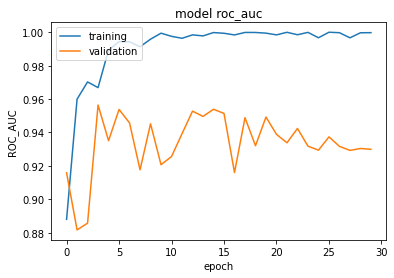

18/18 [==============================] - 0s 3ms/step


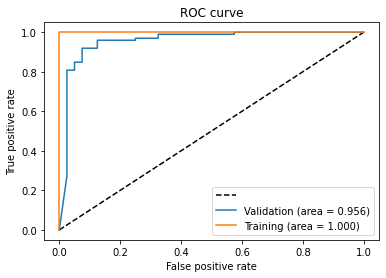

In [19]:
model = keras.Sequential()
model.add(keras.layers.Dense(X_train_nn.shape[-1]+1, activation="relu", input_shape=(X_train_nn.shape[-1],)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

history = model.fit(X_train_t_nn, 
                      y_train_t_nn, 
                      epochs=30, 
                      validation_data=(X_val_nn, y_val_nn), 
                      verbose=0)

test_model_keras(model, history, X_val_nn, y_val_nn, X_train_t_nn, y_train_t_nn)

## Tuning Multi Layer model

In [31]:
def model_builder(hp):

    model = keras.Sequential()
    model.add(Dense(len(X_train_t_nn[0]), input_shape=(len(X_train_t_nn[0]),), activation='relu'))

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 2-length of layers
    hp_units = hp.Int('unit_1', min_value=2, max_value=2000, step=10)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    
    # dropout layer reduces overfitting
    hp_units = hp.Float('dropout_1', min_value=0.0, max_value=0.5, default=0.25, step=0.05)
    model.add(keras.layers.Dropout(hp_units))
    
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 2-length of layers
    hp_units = hp.Int('unit_2', min_value=2, max_value=2000, step=10)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=METRICS)

    return model

### Instantiate the tuner and perform hypertuning

https://www.tensorflow.org/tutorials/keras/keras_tuner The Hyperband tuning algorithm uses adaptive resource allocation and early-stopping to quickly converge on a high-performing model. This is done using a sports championship style bracket. The algorithm trains a large number of models for a few epochs and carries forward only the top-performing half of models to the next round. Hyperband determines the number of models to train in a bracket by computing 1 + logfactor(max_epochs) and rounding it up to the nearest integer. Create a callback to stop training early after reaching a certain value for the validation loss.



To instantiate the Hyperband tuner, you must specify the hypermodel, the objective to optimize and the maximum number of epochs to train (max_epochs).

In [32]:
tuner = kt.Hyperband(model_builder,
                     objective=kt.Objective("val_auc", direction="max"),
                     max_epochs=10,
                     factor=3,
                     seed=SEED, 
                     directory="results_dir",
                     project_name="odor",
                     overwrite=True,)

tuner.search(X_train_t_nn, 
             y_train_t_nn, 
             epochs=30,
             validation_data=(X_val_nn, y_val_nn),
             callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss")])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 30 Complete [00h 00m 03s]
val_auc: 0.9617424011230469

Best val_auc So Far: 0.9674242734909058
Total elapsed time: 00h 01m 13s
INFO:tensorflow:Oracle triggered exit


In [33]:
print(f"""
The hyperparameter search is complete. \n The optimal number of units in the first densely-connected
layer is {best_hps.get('unit_1')} \n The optimal number of units in the second densely-connected
layer is {best_hps.get('unit_2')} \n The optimal number of dropouts in the first densely-connected
layer is {best_hps.get('dropout_1')}.\n The optimal learning 
rate is  {best_hps.get('learning_rate')}
""")


The hyperparameter search is complete. 
 The optimal number of units in the first densely-connected
layer is 1862 
 The optimal number of units in the second densely-connected
layer is 1002 
 The optimal number of dropouts in the first densely-connected
layer is 0.2.
 The optimal learning 
rate is  0.001



In [44]:
model3 = tuner.hypermodel.build(best_hps)
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1203)              1448412   
                                                                 
 dense_17 (Dense)            (None, 1862)              2241848   
                                                                 
 dropout_4 (Dropout)         (None, 1862)              0         
                                                                 
 dense_18 (Dense)            (None, 1002)              1866726   
                                                                 
 dense_19 (Dense)            (None, 1)                 1003      
                                                                 
Total params: 5,557,989
Trainable params: 5,557,989
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
18/18 [==============================] - 2s 60ms/step - loss: 0.7348 - tp: 424.0000 - fp: 53.0000 - tn: 147.0000 - fn: 68.0000 - precision: 0.8889 - recall: 0.8618 - auc: 0.8555 - val_loss: 0.2203 - val_tp: 92.0000 - val_fp: 6.0000 - val_tn: 34.0000 - val_fn: 7.0000 - val_precision: 0.9388 - val_recall: 0.9293 - val_auc: 0.9653
Epoch 2/30
18/18 [==============================] - 1s 43ms/step - loss: 0.2106 - tp: 370.0000 - fp: 30.0000 - tn: 130.0000 - fn: 23.0000 - precision: 0.9250 - recall: 0.9415 - auc: 0.9673 - val_loss: 0.2803 - val_tp: 95.0000 - val_fp: 8.0000 - val_tn: 32.0000 - val_fn: 4.0000 - val_precision: 0.9223 - val_recall: 0.9596 - val_auc: 0.9559
Epoch 3/30
18/18 [==============================] - 1s 45ms/step - loss: 0.1387 - tp: 382.0000 - fp: 21.0000 - tn: 139.0000 - fn: 11.0000 - precision: 0.9479 - recall: 0.9720 - auc: 0.9860 - val_loss: 0.3215 - val_tp: 93.0000 - val_fp: 8.0000 - val_tn: 32.0000 - val_fn: 6.0000 - val_precision: 0.9208 - val_recall: 0.

18/18 [==============================] - 1s 44ms/step - loss: 0.0156 - tp: 391.0000 - fp: 2.0000 - tn: 158.0000 - fn: 2.0000 - precision: 0.9949 - recall: 0.9949 - auc: 0.9999 - val_loss: 0.9763 - val_tp: 96.0000 - val_fp: 8.0000 - val_tn: 32.0000 - val_fn: 3.0000 - val_precision: 0.9231 - val_recall: 0.9697 - val_auc: 0.9288
Epoch 26/30
18/18 [==============================] - 1s 43ms/step - loss: 0.0129 - tp: 392.0000 - fp: 2.0000 - tn: 158.0000 - fn: 1.0000 - precision: 0.9949 - recall: 0.9975 - auc: 0.9999 - val_loss: 0.9235 - val_tp: 96.0000 - val_fp: 7.0000 - val_tn: 33.0000 - val_fn: 3.0000 - val_precision: 0.9320 - val_recall: 0.9697 - val_auc: 0.9313
Epoch 27/30
18/18 [==============================] - 1s 44ms/step - loss: 0.0186 - tp: 390.0000 - fp: 1.0000 - tn: 159.0000 - fn: 3.0000 - precision: 0.9974 - recall: 0.9924 - auc: 0.9997 - val_loss: 1.0098 - val_tp: 93.0000 - val_fp: 5.0000 - val_tn: 35.0000 - val_fn: 6.0000 - val_precision: 0.9490 - val_recall: 0.9394 - val_auc:

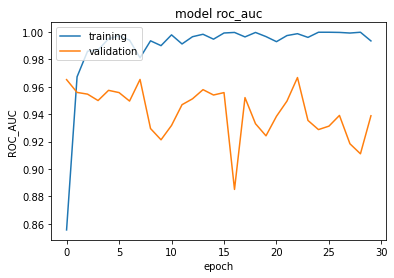

18/18 [==============================] - 0s 5ms/step


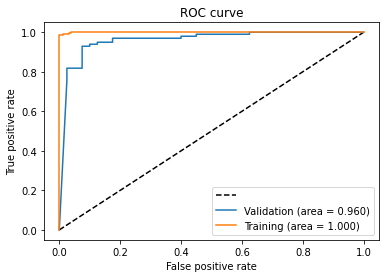

In [45]:
# Build the model with the optimal hyperparameters 
history = model3.fit( X_train_t_nn, 
                      y_train_t_nn, 
                      epochs=30, 
                      validation_data=(X_val_nn, y_val_nn), 
                      verbose=1)

test_model_keras(model3, history, X_val_nn, y_val_nn, X_train_t_nn, y_train_t_nn)

## Feature selection 

Using the set of the top 100 descriptors from RF and XGB, filter the dataset by these descriptors, and then measure validation accuracy

In [56]:
def model_builder_2(hp):

    model = keras.Sequential()
    model.add(Dense(len(X_train_t_nn_temp[0]), input_shape=(len(X_train_t_nn_temp[0]),), activation='relu'))
    
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 2-length of layers
    hp_units = hp.Int('unit_1', min_value=2, max_value=2000, step=10)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    
    # dropout layer reduces overfitting
    hp_units = hp.Float('dropout_1', min_value=0.0, max_value=0.5, default=0.25, step=0.05)
    model.add(keras.layers.Dropout(hp_units))
    
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 2-length of layers
    hp_units = hp.Int('unit_2', min_value=2, max_value=2000, step=10)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 2-length of layers
    hp_units = hp.Int('unit_3', min_value=2, max_value=2000, step=10)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 5e-2, 1e-3, 5e-3, 1e-4, 5e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=METRICS)

    return model

### Use different algorithms for feature ranking

In [654]:
import sklearn.feature_selection as fs
from sklearn.svm import LinearSVC

algos = ['rf', 'l1', 'f_classif', 'mutual_info_classif', 'random']
ks = [1, 5, 15, 50, 100, 400, 800, 1203]

accuracy_2 = pd.DataFrame(index = ks, columns = algos)

for algo in algos:
  print(algo)
  
  for k in ks:
        print(k)

        X_train_t_nn_temp = X_train_t_nn.copy()
        X_val_nn_temp = X_val_nn.copy()
        
        if algo == 'random':
            ranking['random'] = list(range(len(X_train_t_nn)))
            random.shuffle(ranking['random'])
            top_n = ranking[algo][0:k]
            X_train_t_nn_temp = (X_train_t_nn)[:,top_n]
            X_val_nn_temp = (X_val_nn)[:,top_n]
        else:
            if algo == 'f_classif': 
                bk = fs.SelectKBest(fs.f_classif, k=k)
                bk.fit(X_train_t_nn, y_train_t_nn)
            elif algo == "mutual_info_classif":
                bk = fs.SelectKBest(fs.mutual_info_classif, k=k)
                bk.fit(X_train_t_nn, y_train_t_nn)
            elif algo == 'rf':
                tuned_rf.fit(X_train_t_nn_temp, y_train_t_nn)
                bk = fs.SelectFromModel(tuned_rf, prefit=True, max_features=k)
            elif algo == 'l1': 
                lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train_t_nn, y_train_t_nn)
                bk = fs.SelectFromModel(lsvc, prefit=True)

            X_train_t_nn_temp = bk.transform(X_train_t_nn)
            X_val_nn_temp = bk.transform(X_val_nn_temp)
        
        tuner = kt.Hyperband(model_builder_2,
                             objective=kt.Objective("val_auc", direction="max"),
                             max_epochs=10,
                             factor=3,
                             seed=SEED, 
                             directory="results_dir",
                             project_name="odor",
                             overwrite=True,)

        tuner.search(X_train_t_nn_temp, 
                     y_train_t_nn, 
                     epochs=30,
                     validation_data=(X_val_nn_temp, y_val_nn),
                     callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss")])

        # Get the optimal hyperparameters
        best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
  
        model_temp = tuner.hypermodel.build(best_hps)
        model_temp.summary()

        history = model_temp.fit(X_train_t_nn_temp, 
                             y_train_t_nn, 
                             epochs=30, 
                             validation_data=(X_val_nn_temp, y_val_nn), 
                             verbose=0)

        y_pred_keras = model_temp.predict(X_val_nn_temp).ravel()
        auc_keras = metrics.roc_auc_score(y_val_nn, y_pred_keras)
        accuracy_2.loc[k, algo] = auc_keras
        
        
accuracy_2

Trial 30 Complete [00h 00m 04s]
val_auc: 0.881944477558136

Best val_auc So Far: 0.963762640953064
Total elapsed time: 00h 01m 50s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 553)               306362    
                                                                 
 dense_6 (Dense)             (None, 112)               62048     
                                                                 
 dropout_1 (Dropout)         (None, 112)               0         
                                                                 
 dense_7 (Dense)             (None, 1202)              135826    
                                                                 
 dense_8 (Dense)             (None, 582)               700146    
                                                                 
 dense_9 (Dense)             (None, 1)                 583       
                                                                 
Total params: 1,204,965
Trainable params: 1,204,965
No

,rf,l1,f_classif,mutual_info_classif,random
1,0.876894,0.919444,0.889773,0.876894,0.5
5,0.924495,0.911869,0.942045,0.896212,0.886869
15,0.92904,0.934343,0.94899,0.940783,0.935859
50,0.962121,0.935606,0.961111,0.935227,0.953788
100,0.940278,0.912879,0.964646,0.948611,0.952778
400,0.956566,0.922348,0.958586,0.952525,0.954545
800,0.95846,0.938636,0.958586,0.964646,0.954419
1203,0.958081,0.918434,0.958838,0.950126,0.965278


Text(0, 0.5, 'ROC_AUC')

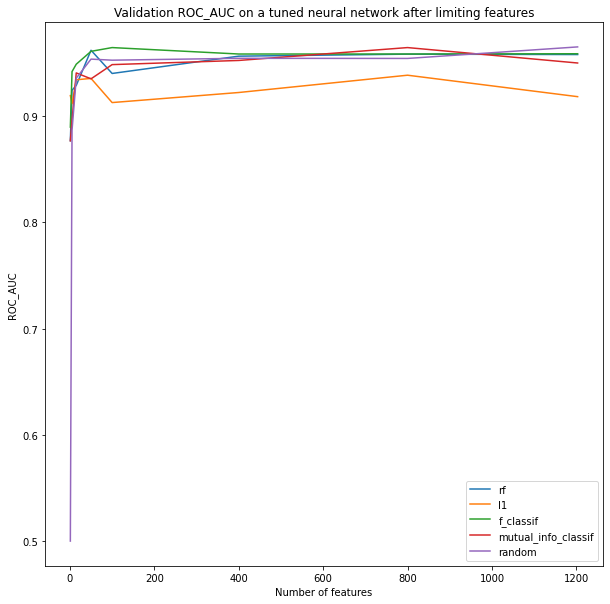

In [658]:
ax = accuracy_2.plot(figsize=(10, 10))
ax.set_title("Validation ROC_AUC on a tuned neural network after limiting features")
ax.set_xlabel("Number of features")
ax.set_ylabel("ROC_AUC")

Choose f_classif method of feature selection, with 100 features.
### Retune and retrain model

In [30]:
def model_builder_3(hp):

    model = keras.Sequential()
    model.add(Dense(100, input_shape=(100,), activation='relu'))

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 2-length of layers
    hp_units = hp.Int('unit_1', min_value=2, max_value=2000, step=10)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    
    # dropout layer reduces overfitting
    hp_units = hp.Float('dropout_1', min_value=0.0, max_value=0.5, default=0.25, step=0.05)
    model.add(keras.layers.Dropout(hp_units))
    
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 2-length of layers
    hp_units = hp.Int('unit_2', min_value=2, max_value=2000, step=10)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=METRICS)

    return model

In [45]:
import sklearn.feature_selection as fs

bk = fs.SelectKBest(fs.f_classif, k=100)
bk.fit(X_train_nn, y_train_nn)
X_train_nn = bk.transform(X_train_nn)

/home/zoya/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  23  505  506  507  508  509  510  524  526  527  531  537  543  544
  545  547  548  551  559  560  561  562  563  564  565  566  567  568
  569  570  571  572  573  575  576  577  578  580  581  582  583  584
  585  586  587  588  589  603  605  606  610  616  622  623  624  626
  627  630  638  639  640  641  642  643  644  645  646  647  648  649
  650  651  652  654  655  656  657  659  660  661  662  938  948 1015
 1017 1018 1019 1027 1028 1029 1030 1031 1032 1034 1035 1038 1039 1040
 1041 1042 1043 1044 1046 1047 1050 1051 1052 1053 1054 1055 1056 1063
 1065 1066 1067 1075 1076 1077 1078 1079 1080 1082 1083 1090 1093 1094
 1095 1101 1104 1105 1106 1107 1108 1111 1112 1115 1116 1117 1118 1119
 1122 1123 1126 1127 1134 1137 1138 1139 1145] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/zoya/anaconda3

In [46]:
X_val_nn = bk.transform(X_val_nn)

In [61]:
X_test_nn = bk.transform(X_test_nn)

In [63]:
X_train_t_nn = bk.transform(X_train_t_nn)

In [64]:
print(X_val_nn.shape)
tuner = kt.Hyperband(model_builder_3,
                     objective=kt.Objective("val_auc", direction="max"),
                     max_epochs=10,
                     factor=3,
                     seed=SEED, 
                     directory="results_dir",
                     project_name="odor",
                     overwrite=True,)
                     
tuner.search(X_train_t_nn, 
             y_train_t_nn, 
             epochs=30,
             validation_data=(X_val_nn, y_val_nn),
             callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss")])

Trial 30 Complete [00h 00m 02s]
val_auc: 0.9483585953712463

Best val_auc So Far: 0.9607323408126831
Total elapsed time: 00h 00m 56s
INFO:tensorflow:Oracle triggered exit


In [65]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. \n The optimal number of units in the first densely-connected
layer is {best_hps.get('unit_1')} \n The optimal number of units in the second densely-connected
layer is {best_hps.get('unit_2')} \n The optimal number of dropouts in the first densely-connected
layer is {best_hps.get('dropout_1')}.\n The optimal learning 
rate is  {best_hps.get('learning_rate')}
""")


The hyperparameter search is complete. 
 The optimal number of units in the first densely-connected
layer is 232 
 The optimal number of units in the second densely-connected
layer is 682 
 The optimal number of dropouts in the first densely-connected
layer is 0.45.
 The optimal learning 
rate is  0.01



In [78]:
model4 = tuner.hypermodel.build(best_hps)
model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 100)               10100     
                                                                 
 dense_25 (Dense)            (None, 232)               23432     
                                                                 
 dropout_6 (Dropout)         (None, 232)               0         
                                                                 
 dense_26 (Dense)            (None, 682)               158906    
                                                                 
 dense_27 (Dense)            (None, 1)                 683       
                                                                 
Total params: 193,121
Trainable params: 193,121
Non-trainable params: 0
_________________________________________________________________


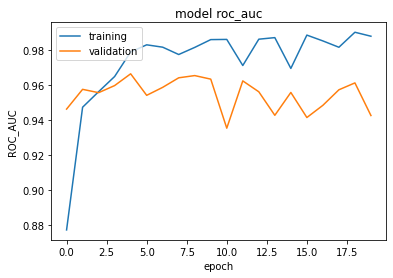

22/22 [==============================] - 0s 2ms/step


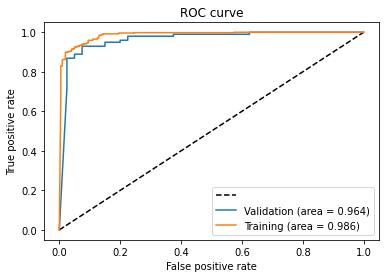

In [79]:
# Build the final model with all the training data with the optimal hyperparameters 
history = model4.fit(X_train_t_nn, 
                      y_train_t_nn, 
                      epochs=20, 
                      validation_data=(X_val_nn, y_val_nn), 
                      verbose=0)

test_model_keras(model4, history, X_val_nn, y_val_nn, X_train_nn, y_train_nn)

In [ ]:
model4 = tuner.hypermodel.build(best_hps)

# Build the final model with all the training data with the optimal hyperparameters 
history = model4.fit(X_train_nn, 
                      y_train_nn, 
                      epochs=20, 
                      validation_data=(X_val_nn, y_val_nn), 
                      verbose=0)

test_model_keras(model4, history, X_val_nn, y_val_nn, X_train_nn, y_train_nn)

## Evaluate model on test data

6/6 [==============================] - 0s 2ms/step


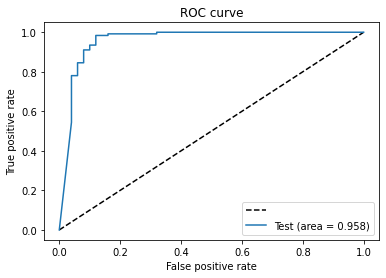

In [68]:
y_pred_t_keras = model4.predict(X_test_nn).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_nn, y_pred_t_keras)
auc_t_keras = metrics.roc_auc_score(y_test_nn, y_pred_t_keras)
auc_t_keras

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(['', 'Test (area = {:.3f})'.format(auc_t_keras)], loc='best')
plt.show()
plt.show()

# MLP Neural Network

In [111]:
# for readibility 
y_train_nn = y_train.copy()
y_test_nn = y_test.copy()
X_train_nn = X_train.copy()
X_test_nn = X_test.copy()
X_train_nn, X_test_nn = handleNaNs(X_train.copy(), X_test.copy(), option=1)

In [109]:
from sklearn.neural_network import MLPClassifier

In [113]:
nn = MLPClassifier(random_state=1, max_iter=300).fit(X_train_nn, y_train_nn)

ROC_AUC (TEST): 0.8881300813008131


CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.85      0.70      0.77        50
        True       0.89      0.95      0.92       123

    accuracy                           0.88       173
   macro avg       0.87      0.83      0.84       173
weighted avg       0.88      0.88      0.87       173



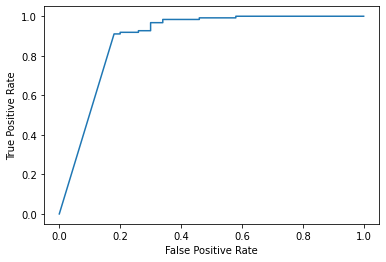

0.8881300813008131

In [120]:
test_model(nn, y_test_nn, X_test_nn)

In [144]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,), (), (500)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.1, 0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(nn, parameter_space, n_jobs=-1, cv=3, verbose=1)
clf.fit(X_train_nn, y_train_nn) # X is train samples and y is the corresponding labels

Fitting 3 folds for each of 160 candidates, totalling 480 fits


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=300, random_state=1),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.1, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,), (), 500],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=1)

In [148]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 500, 'learning_rate': 'constant', 'solver': 'adam'}


In [151]:
clf.best_score_

0.8670431018257104

In [146]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.231588,0.299514,0.036137,0.002327,tanh,0.0001,"(50, 50, 50)",constant,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.705628,0.718615,0.704348,0.709530,0.006445,143
1,2.750784,0.299345,0.041854,0.010961,tanh,0.0001,"(50, 50, 50)",constant,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.705628,0.744589,0.765217,0.738478,0.024708,92
2,6.275921,1.251287,0.053068,0.007181,tanh,0.0001,"(50, 50, 50)",adaptive,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.701299,0.722944,0.713043,0.712429,0.008847,118
3,2.581100,0.271426,0.035979,0.003377,tanh,0.0001,"(50, 50, 50)",adaptive,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.705628,0.744589,0.765217,0.738478,0.024708,92
4,1.846552,0.427306,0.039066,0.003357,tanh,0.0001,"(50, 100, 50)",constant,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.705628,0.709957,0.713043,0.709543,0.003042,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,4.718206,1.469224,0.059913,0.006992,relu,0.05,(),adaptive,adam,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.831169,0.809524,0.839130,0.826608,0.012510,45
156,5.597548,0.187715,0.088921,0.049270,relu,0.05,500,constant,sgd,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.722944,0.701299,0.717391,0.713878,0.009179,116
157,13.962087,2.878855,0.026094,0.008910,relu,0.05,500,constant,adam,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.826840,0.883117,0.830435,0.846797,0.025724,21
158,15.805204,0.343765,0.021378,0.002148,relu,0.05,500,adaptive,sgd,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.718615,0.718615,0.726087,0.721105,0.003522,105


ROC_AUC (TEST): 0.9266666666666666


CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.70      0.88      0.78        50
        True       0.95      0.85      0.89       123

    accuracy                           0.86       173
   macro avg       0.82      0.86      0.84       173
weighted avg       0.87      0.86      0.86       173



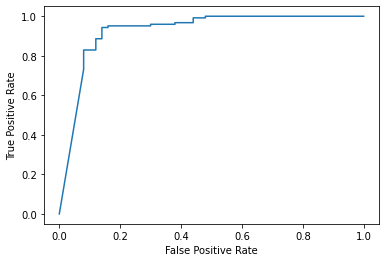

0.9266666666666666

In [147]:
test_model(clf.best_estimator_, y_test_nn, X_test_nn)